Import bibliotek

In [29]:
import string
import nltk
import json
import numpy as np
import pandas as pd
import itertools as it
import operator as op

from wordcloud import WordCloud
from matplotlib import pyplot as plt
from nltk import word_tokenize
from nltk.corpus import PlaintextCorpusReader
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

# Korpus dokumentów

In [30]:
corpus_dir = "./streszczenie_original"
corpus = PlaintextCorpusReader(corpus_dir, ".*\\.txt")
files_names = corpus.fileids()
files_names

['Harry Potter i Czara Ognia.txt',
 'Harry Potter i Insygnia Smierci.txt',
 'Harry Potter i Kamien Filozoficzny.txt',
 'Harry Potter i Komnata Tajemnic.txt',
 'Harry Potter i Ksiaze Polkrwi.txt',
 'Harry Potter i Przeklete Dziecko.txt',
 'Harry Potter i Wiezien Azkabanu.txt',
 'Harry Potter i Zakon Feniksa.txt',
 'Opowiesci z Narni. Kon i jego chlopiec.txt',
 'Opowiesci z Narni. Ksiaze Kaspian.txt',
 'Opowiesci z Narni. Lew, czarownica i stara szafa.txt',
 'Opowiesci z Narni. Ostatnia bitwa.txt',
 'Opowiesci z Narni. Podroz Wedrowca do Switu.txt',
 'Opowiesci z Narni. Siostrzeniec Czarodzieja.txt',
 'Opowiesci z Narni. Srebrne krzeslo.txt',
 'Zmierzch.Ksiezyc w Nowiu.txt',
 'Zmierzch.Przed Switem.txt',
 'Zmierzch.Zacmienie.txt',
 'Zmierzch.Zmierzch.txt',
 'Zmierzch.Zycie i Smierc.txt']

# Wstępne przygotowanie dokumentów

In [31]:
documents= {}
for file in files_names:
    documents[file] = corpus.raw(file)
print(json.dumps(documents, indent=4, ensure_ascii=False))

{
    "Harry Potter i Czara Ognia.txt": "Lord Voldemort, wraz ze swoim sługą Glizdogonem przybywa do domu należącego niegdyś do rodziny Riddle'ów położonego w Little Hangleton. Tam układają plan dotyczący zamordowania Harry'ego Pottera, co ma pomóc Czarnemu Panu w odzyskaniu jego dawnej mocy. Jest także mowa o wiernym słudze Czarnego Pana, który wkrótce ma znaleźć się w Hogwarcie. Wszystko to słyszy mieszkający nieopodal ogrodnik, Frank Bryce. Voldemort odkrywając, iż mężczyzna podsłuchuje, zaprasza go do środka i uśmierca. Harry budzi się z przerażającego snu. Jego blizna pulsuje okropnym bólem. Próbuje sobie przypomnieć o czym śnił, a z pamięci wyłania się obraz mrocznego pokoju, węża leżącego przed kominkiem oraz Glizdogona i Lorda Voldemorta planujących morderstwo. Harry zastanawia się czy powinien komuś powiedzieć o problemach z blizną, ponieważ, gdy bolała go ostatnim razem, Voldemort wdarł się do Hogwartu. Ostatecznie postanawia napisać do Syriusza i zejść na śniadanie. W trakci

In [32]:
stoplist_file = open("./stopwords_pl.txt", "r", encoding="utf-8")
stoplist = stoplist_file.read()
stoplist_file.close()
stoplist = stoplist[4:]
stoplist

'is file was created from the carrot2 project and is distributed under the BSD license.\n# See http://project.carrot2.org/license.html\n# Also see http://www.opensource.org/licenses/bsd-license.html\n# From trunk/core/carrot2-util-text/src-resources/stopwords.pl\nvol\no.o.\nmgr\ngodz\nzł\nwww\npl\nul\ntel\nhab\nprof\ninż\ndr\ni\nu\naby\nalbo\nale\nani\naż\nbardzo\nbez\nbo\nbowiem\nby\nbyli\nbym\nbył\nbyła\nbyło\nbyły\nbyć\nbędzie\nbędą\nchce\nchoć\nco\ncoraz\ncoś\nczy\nczyli\nczęsto\ndla\ndo\ngdy\ngdyby\ngdyż\ngdzie\ngo\nich\nim\ninne\niż\nja\njak\njakie\njako\nje\njednak\njednym\njedynie\njego\njej\njest\njeszcze\njeśli\njeżeli\njuż\nją\nkiedy\nkilku\nkto\nktóra\nktóre\nktórego\nktórej\nktóry\nktórych\nktórym\nktórzy\nlat\nlecz\nlub\nma\nmają\nmamy\nmi\nmiał\nmimo\nmnie\nmogą\nmoże\nmożna\nmu\nmusi\nna\nnad\nnam\nnas\nnawet\nnic\nnich\nnie\nniej\nnim\nniż\nno\nnowe\nnp\nnr\no\nod\nok\non\none\noraz\npan\npo\npod\nponad\nponieważ\npoza\nprzed\nprzede\nprzez\nprzy\nraz\nrazie\nroku\nrów

In [33]:
# Pomijamy na macoes -> brak pakietu morfeusz2
# import morfeusz2
#
# def lemmatize(text):
#     morf = morfeusz2.Morfeusz()
#     segments = it.groupby(morf.analyse(text))
#     def disambiguate(group):
#         pairs = ((len(descr), lemma) for _, _, (_, lemma, descr, _, _,) in group)
#         perpl, lemma = min(pairs)
#         return lemma.split(":")[0]
#     lemmas = (disambiguate(group) for key, group in segments)
#     return " ".join(filter(str.isalpha, lemmas))

In [34]:
for key in documents:
    documents[key] = documents[key].lower()
    documents[key] = "".join([char for char in documents[key] if char not in string.punctuation])
    # documents[key] = lemmatize(documents[key]) # wylaczone na macoes
    documents[key] = " ".join([word for word in word_tokenize(documents[key], language='polish') if word not in stoplist])
print(json.dumps(documents, indent=4, ensure_ascii=False))  # przetworzone slowa do slow podstawowych

{
    "Harry Potter i Czara Ognia.txt": "lord voldemort wraz swoim sługą glizdogonem przybywa domu należącego niegdyś rodziny riddleów położonego little hangleton układają plan dotyczący zamordowania harryego pottera pomóc czarnemu panu odzyskaniu dawnej mocy mowa wiernym słudze czarnego pana wkrótce znaleźć hogwarcie słyszy mieszkający nieopodal ogrodnik frank bryce voldemort odkrywając mężczyzna podsłuchuje zaprasza środka uśmierca harry budzi przerażającego snu blizna pulsuje okropnym bólem próbuje przypomnieć czym śnił pamięci wyłania obraz mrocznego pokoju węża leżącego kominkiem glizdogona lorda voldemorta planujących morderstwo harry zastanawia powinien komuś powiedzieć problemach blizną bolała ostatnim razem voldemort wdarł hogwartu ostatecznie postanawia napisać syriusza zejść śniadanie trakcie śniadania wuj vernon otrzymuje list weasleyowie oferują zabranie harryego finał mistrzostw świata quidditchu ugoszczenie resztę wakacji długim namyśle użyciu harryego odpowiednich argum

# Utworzenie macierzy częstości

In [35]:
docs = pd.DataFrame().from_dict(documents, orient='index')
docs.columns = ['content']
docs # [tabela tytul, content]

content
Harry Potter i Czara Ognia.txt                        lord voldemort wraz swoim sługą glizdogonem przybywa domu należącego niegdyś rodziny riddleów położonego little hangleton układają plan dotyczący zamordowania harryego pottera pomóc czarnemu panu odzyskaniu dawnej mocy mowa wiernym słudze czarnego pana wkrótce znaleźć hogwarcie słyszy mieszkający nieopodal ogrodnik frank bryce voldemort odkrywając mężczyzna podsłuchuje zaprasza środka uśmierca harry budzi przerażającego snu blizna pulsuje okropnym bólem próbuje przypomnieć czym śnił pamięci wyłania obraz mrocznego pokoju węża leżącego kominkiem glizdogona lorda voldemorta planujących morderstwo harry zastanawia powinien komuś powiedzieć problemach blizną bolała ostatnim razem voldemort wdarł hogwartu ostatecznie postanawia napisać syriusza zejść śniadanie trakcie śniadania wuj vernon otrzymuje list weasleyowie oferują zabranie harryego finał mistrzostw świata quidditchu ugoszczenie resztę wakacji długim namyśle użyciu harryego odpowiednich argumentów wuj zgadza wyjazd swoim pokoju harry zastaje świstoświnkę sowę rona listem przyjaciel pisze zabiorą harryego dursleyów następnego dnia piątej względu okoliczności młody czarodziej pośpiesznie odpisuje koledze wysyła list syriusza zaczyna pakować następnego dnia harry rana oczekuje przybycie gości mija piąta nikt pojawia zaczyna bardziej niepokoić nagle salonu dochodzi wrzask wuja vernona okazuje weasleyowie postanowili zabrać harryego używając sieci fiuu problem polega dursleyowie zamurowali szyb kominowy przybysze stamtąd wydostać artur weasley używa zaklęcia usunąć przeszkodę chwili wyłania kominka wraz ronem fredem georgeem bliźniacy idą zabrać kufer harryego weasley stara podtrzymać konwersację wujostwem fred opuścić privet drive 4 kieszeni wypada torebka cukierkami chłopcy pośpiesznie zbierają słodycze pierwszy bliźniaków wyrusza nory idą następni salonie zostają harry weasley harry jedną nogą kominku słyszy sobą okropne rzężenie okazuje dudley zjadł jednego cukierków freda spowodowało język znacznie wydłużył weasley zapewnia harryego doprowadzi porządku każe wyruszyć nory czarodziej zostawia wymachującego różdżką wraz ciotką petunią zasłaniającą dudleya własnym ciałem wujem vernonem ciskającym czarodzieja porcelanowymi figurkami dotarłszy nory harry spotyka pozostałych członków rodziny weasleyów hermionę spędzić resztę wakacji podczas kolacji percy pracuje ministerstwie magii napomyka tajemniczym wydarzeniu mającym mieć miejsce zaraz zakończeniu mistrzostw świata quidditchu wszyscy podekscytowani zbliżającym meczem harry poznaje billa charliego – starszych braci rona samego rana czarodzieje wyruszają wzgórze stoatshead stamtąd przeniosą świstoklikiem wrzosowisko odbędzie finałowy mecz drodze spotykają amosa diggoryego pracownika departament kontroli magicznymi stworzeniami syna cedrika wylądowaniu zamglonym wrzosowisku należącym pana robertsa czarodzieje wyruszają odszukać zarezerwowane miejsce kempingu rozbiciu namiotów harry hermiona ron idą przynieść trochę wody drodze spotykają wielu znajomych powrocie poznają ludo bagmana dyrektora departamentu magicznych gier sportów chwilę później pojawia crouch szef percyego kolejny wywiązuje rozmowa tajemniczych wydarzeniach mieć miejsce hogwarcie odchodzi wszyscy zaopatrują pamiątki rozlega dźwięk gongu – udają stadion ogromnym stadionie harry hermiona weasleyowie zasiadają loży honorowej zastają domową skrzatkę imieniu mrużka zajmuje miejsce swojego pana jakiś czas później przybywa korneliusz knot rodzina malfoyów końcu dociera ludo bagman pełni funkcję komentatora boisku pojawiają gracze wraz sędzią gra rozpoczyna brawurowej akcji jednego zawodników irlandia prowadzi dziesięć zera gra nabiera tempa staje bardziej brutalna irlandczycy prowadzą trzydzieści dziesięciu gracze obu drużyn pozbywają wszelkich hamulców skutkuje rzutach karnych irlandii nagle wiktor krum bułgarski szukający nurkuje lynch leci tuż obaj nabierają prędkości lynch całej siły uderza ziemię krum wzbi

In [36]:
count_vertorizer = CountVectorizer()
counts_tf = count_vertorizer.fit_transform(docs['content'])
counts_tf.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(20, 7334))

In [37]:
tfidf_vectorizer = TfidfVectorizer()
counts_tfidf = tfidf_vectorizer.fit_transform(docs['content'])
counts_tfidf.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.02007235, 0.02283504, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], shape=(20, 7334))

# Chmury tagów

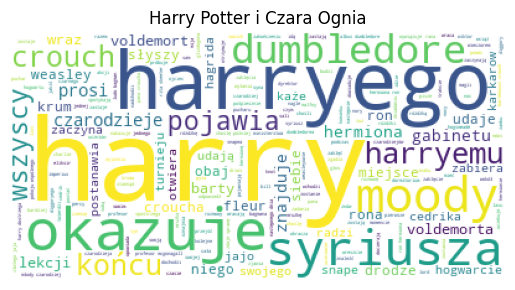

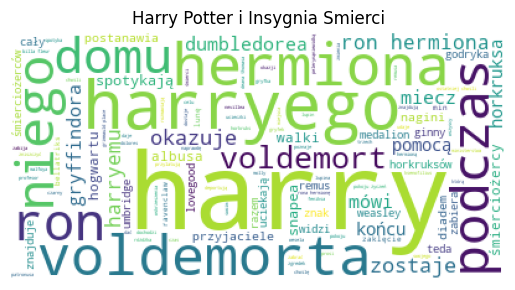

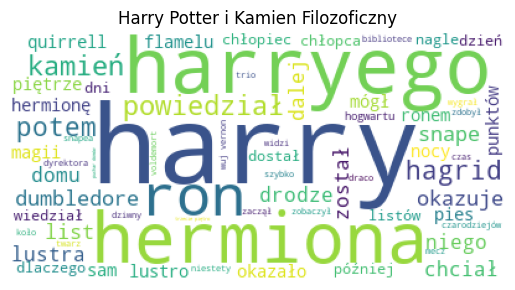

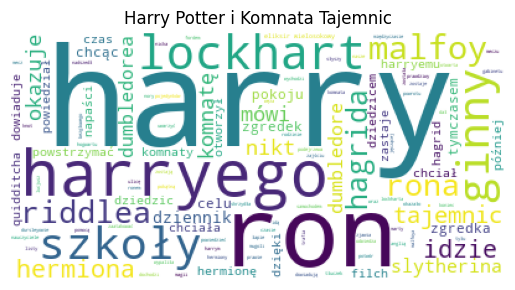

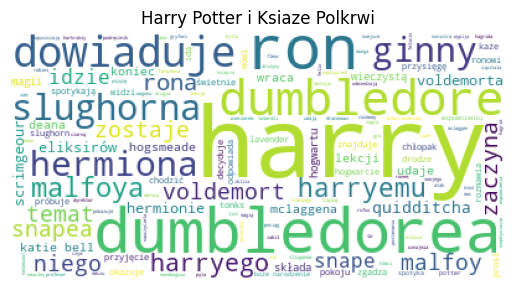

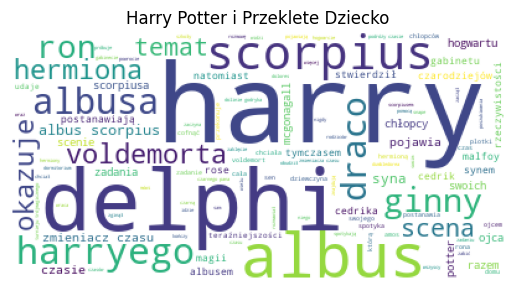

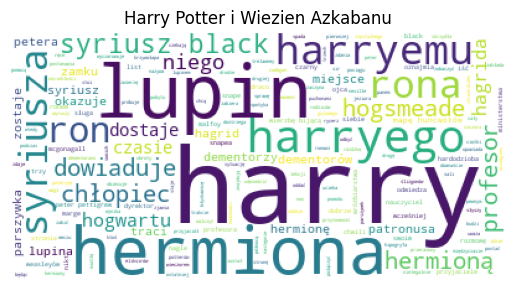

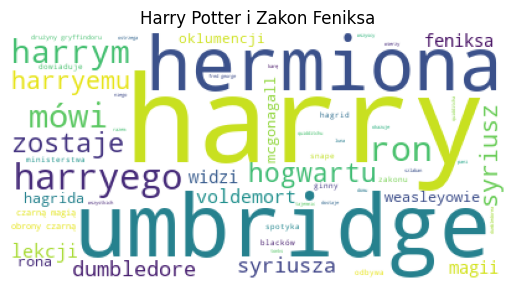

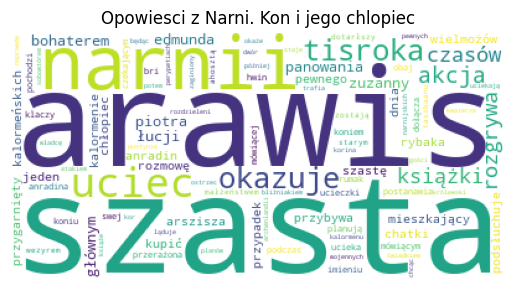

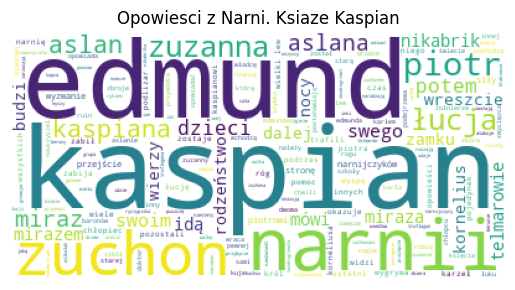

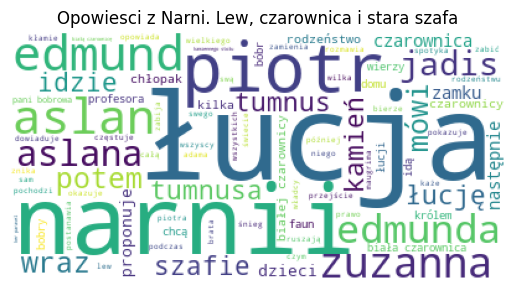

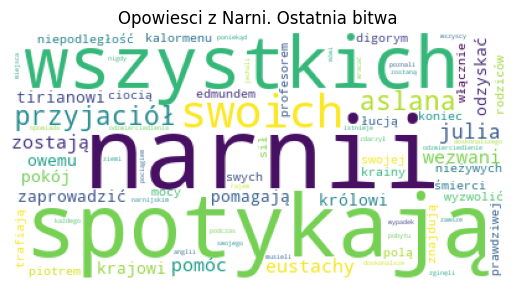

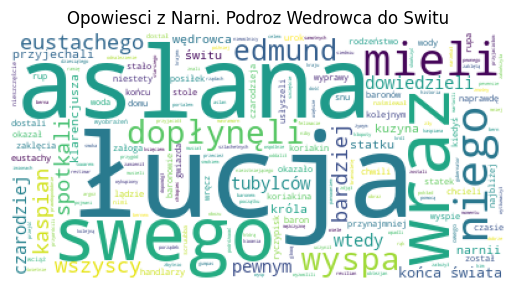

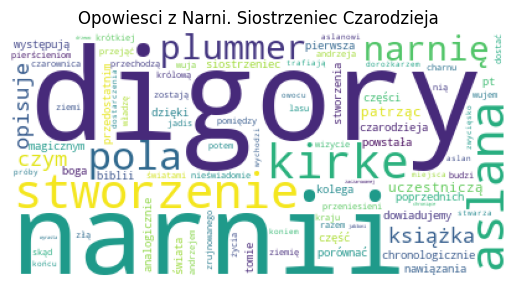

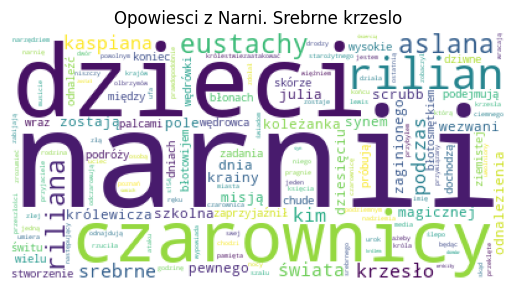

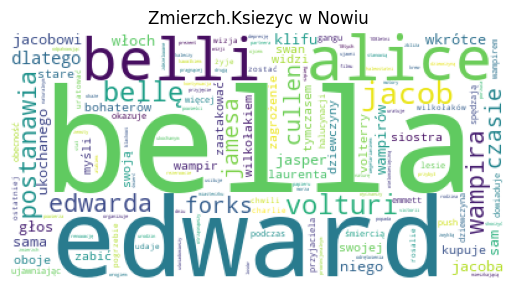

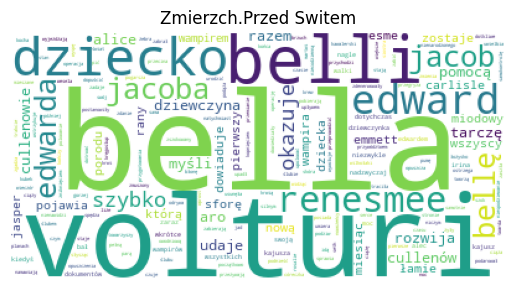

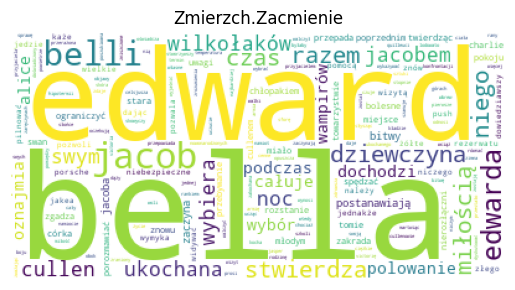

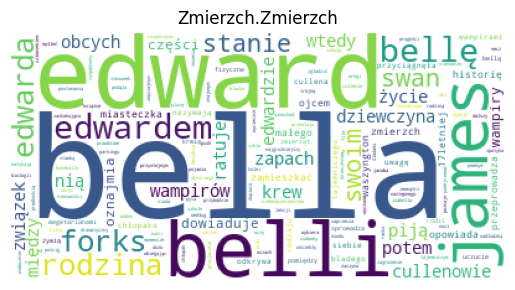

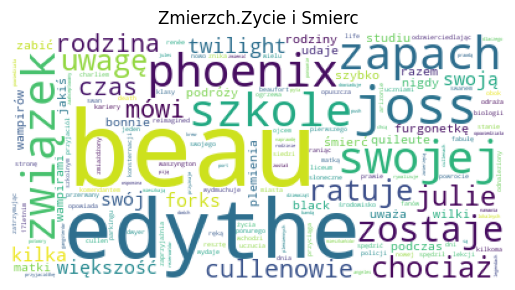

<Figure size 640x480 with 0 Axes>

In [38]:
wordcloud = WordCloud(
        background_color='white',
        max_words=5000,
        contour_width=3,
        contour_color='steelblue'
    )
for index, row in docs.iterrows():
    wordcloud.generate(row['content'])
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title(index.replace(".txt", ""))
    plt.show()
    plt.savefig("./wordclouds/{}".format(index.replace(".txt", ".png")))



# Topic Modeling

In [44]:

def plot_top_words(model, feature_names, n_top_words, title, subplots):
    fig, axes = plt.subplots(*subplots, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[-n_top_words:]
        top_features = feature_names[top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()
    plt.savefig(f"./topics/{title}.png")

In [40]:
n_components = 5
feature_names = count_vertorizer.get_feature_names_out()
n_top_features = 20
size = [1, 5]

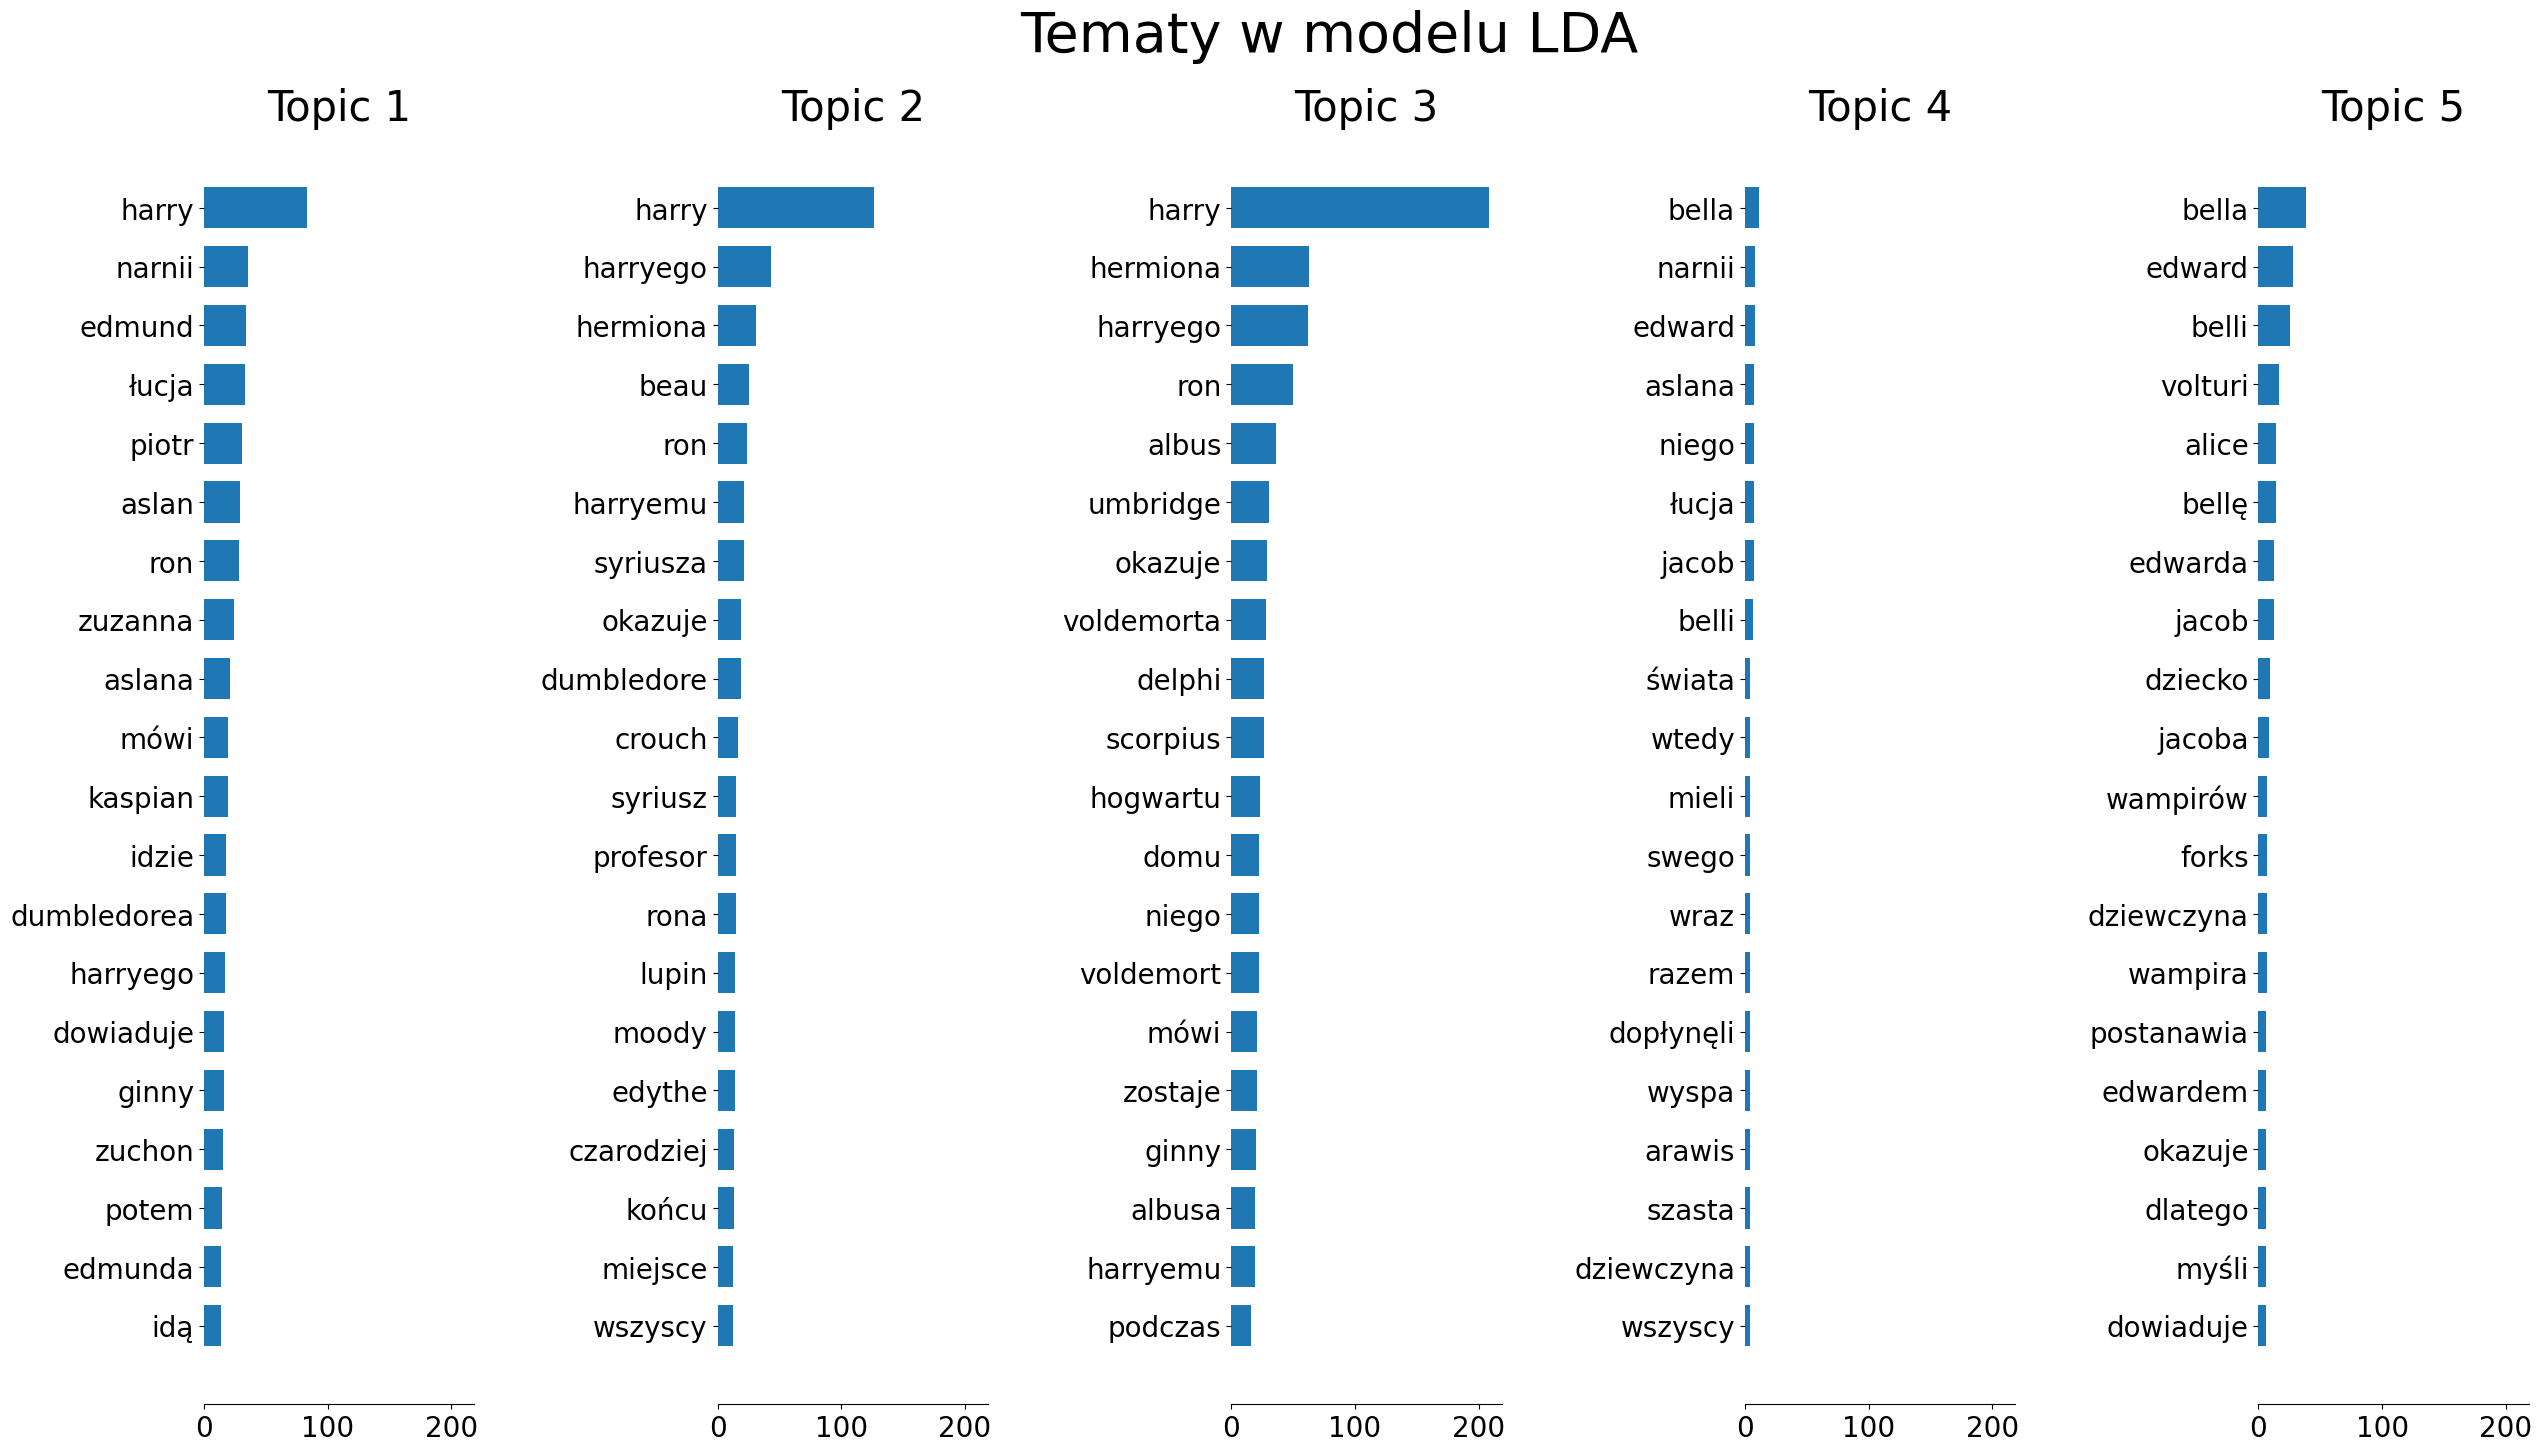

<Figure size 640x480 with 0 Axes>

In [45]:
lda = LatentDirichletAllocation(
    n_components=n_components,
    max_iter=5,
    learning_method='batch',
    learning_offset=50,
    random_state=0
)
lda.fit(counts_tf)
plot_top_words(lda, feature_names, n_top_features, "Tematy w modelu LDA", size)

/opt/miniconda3/envs/py311/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1742: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


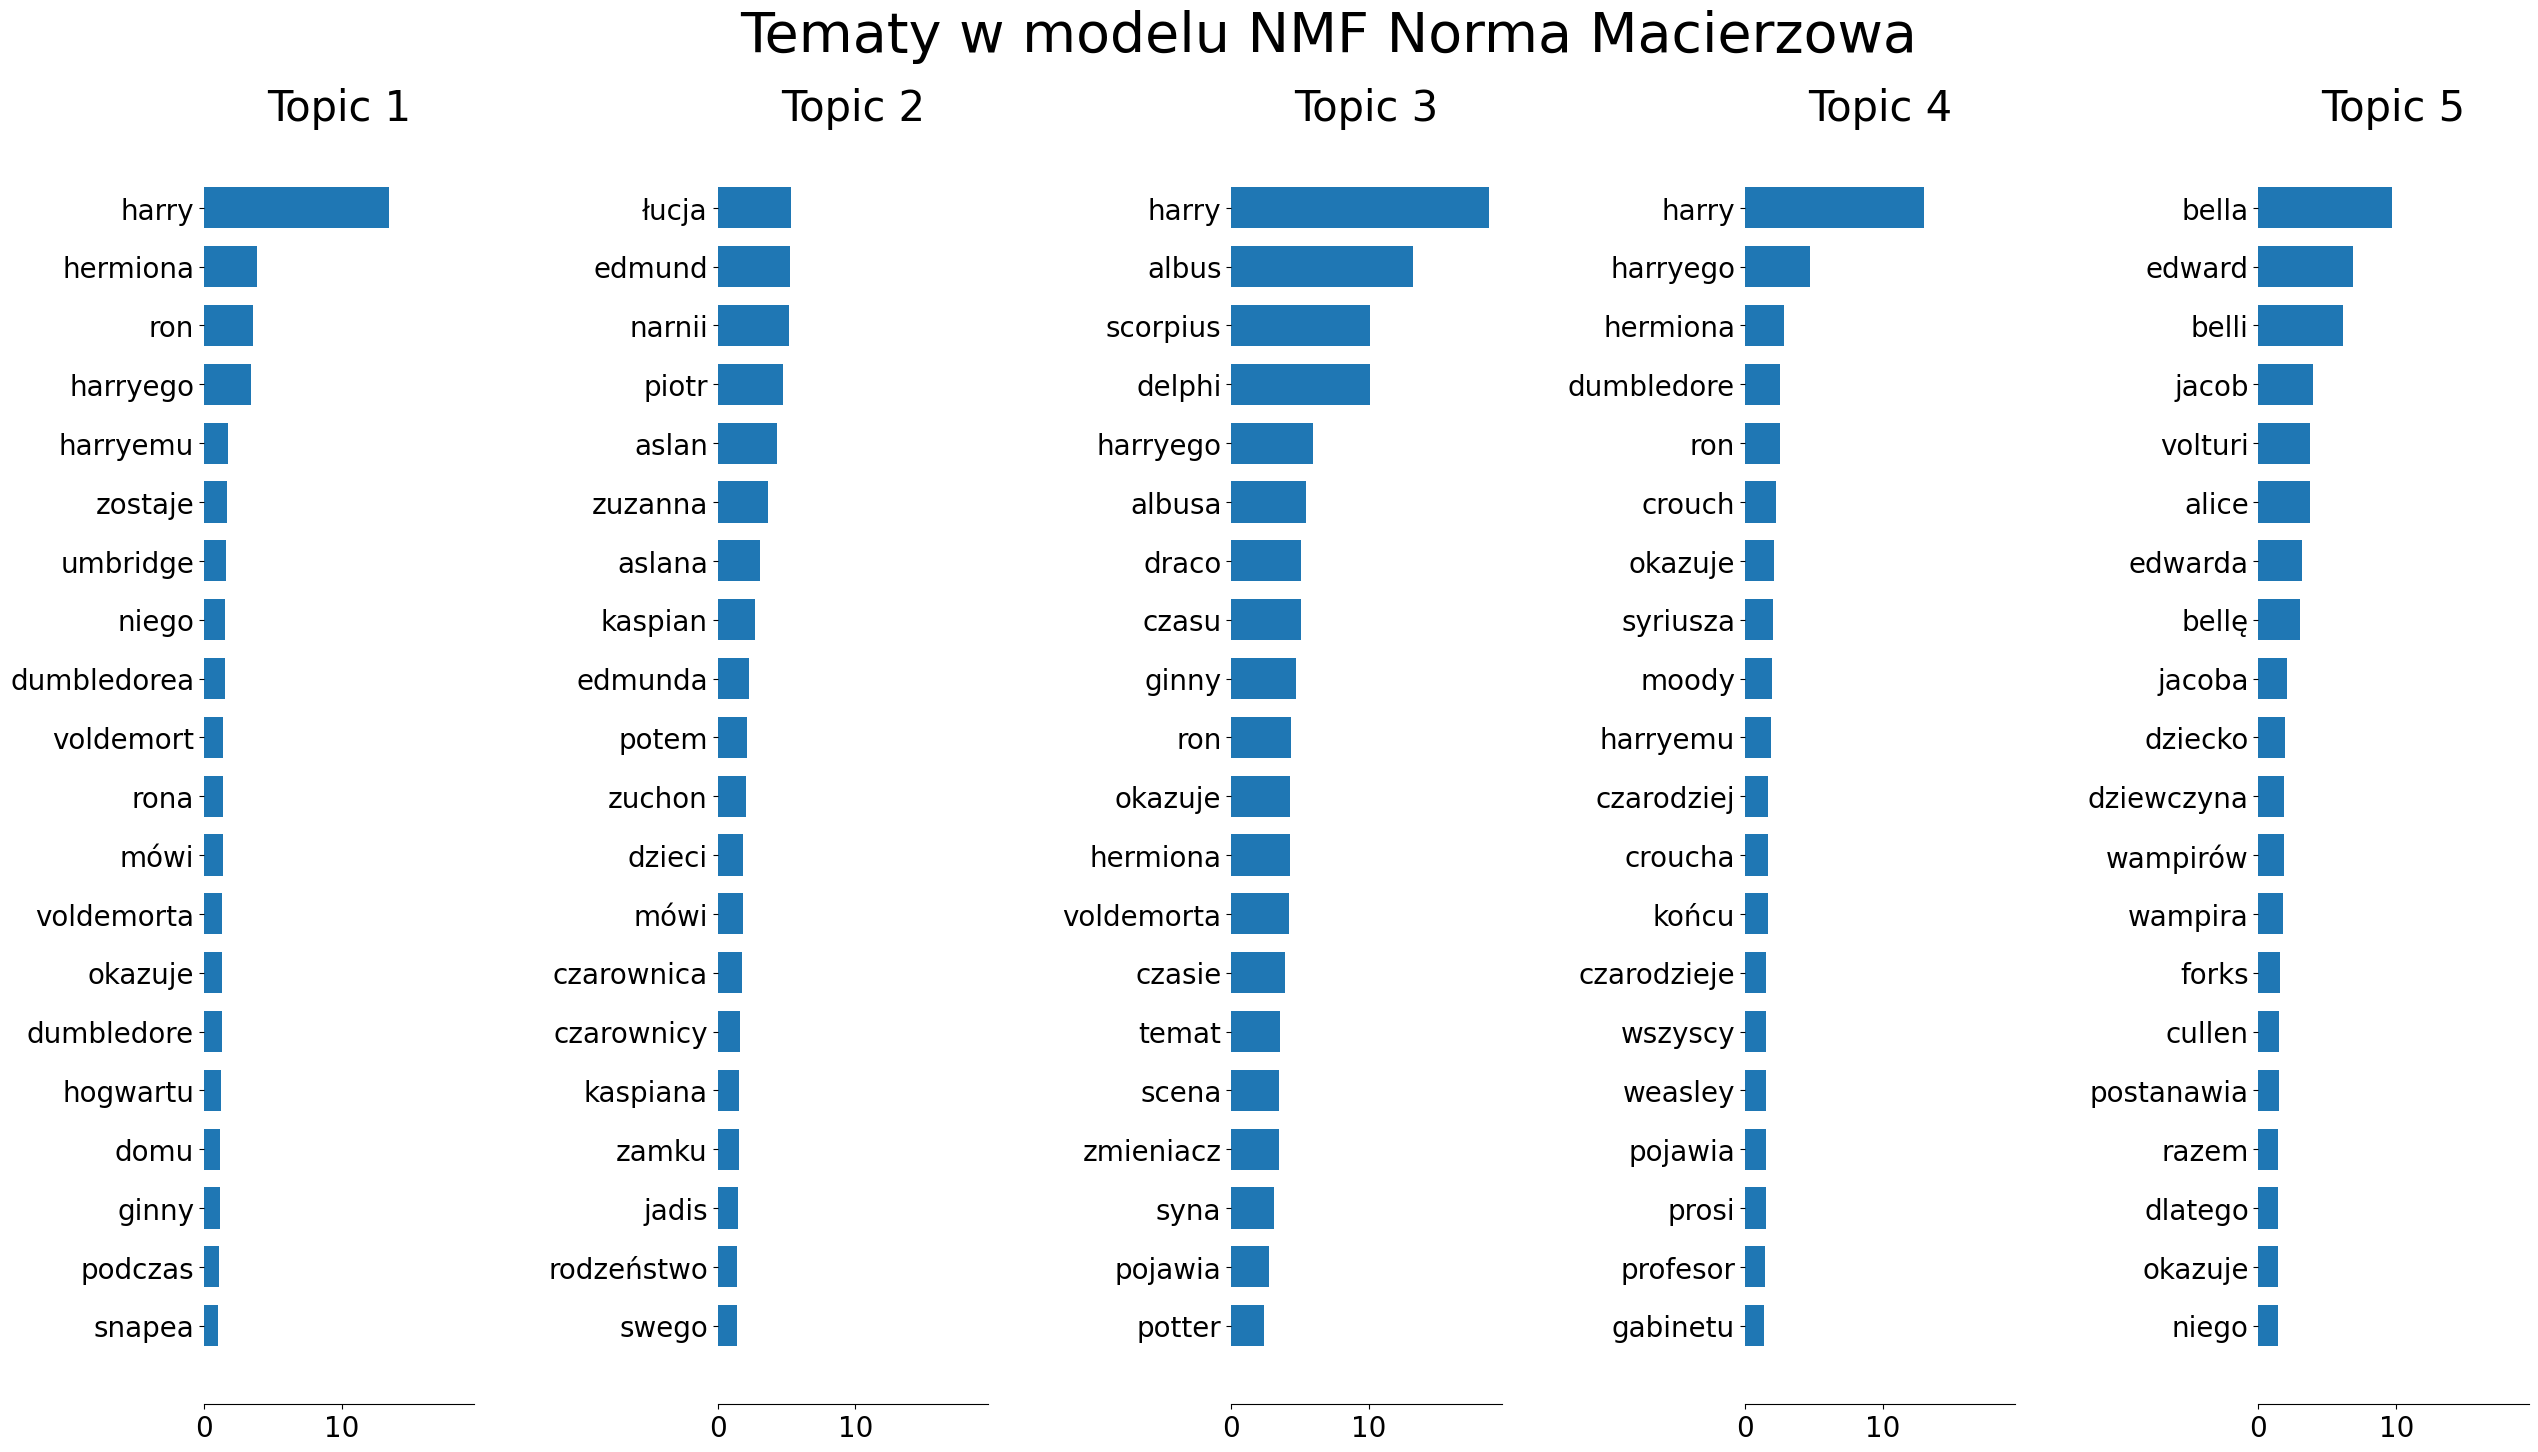

<Figure size 640x480 with 0 Axes>

In [46]:
nmf_fm = NMF(
    n_components=n_components,
    random_state=0,
    alpha_H=.00005,
    alpha_W=.00005,
    l1_ratio=.5,
)
nmf_fm.fit(counts_tf)
plot_top_words(nmf_fm, feature_names, n_top_features, "Tematy w modelu NMF Norma Macierzowa", size)

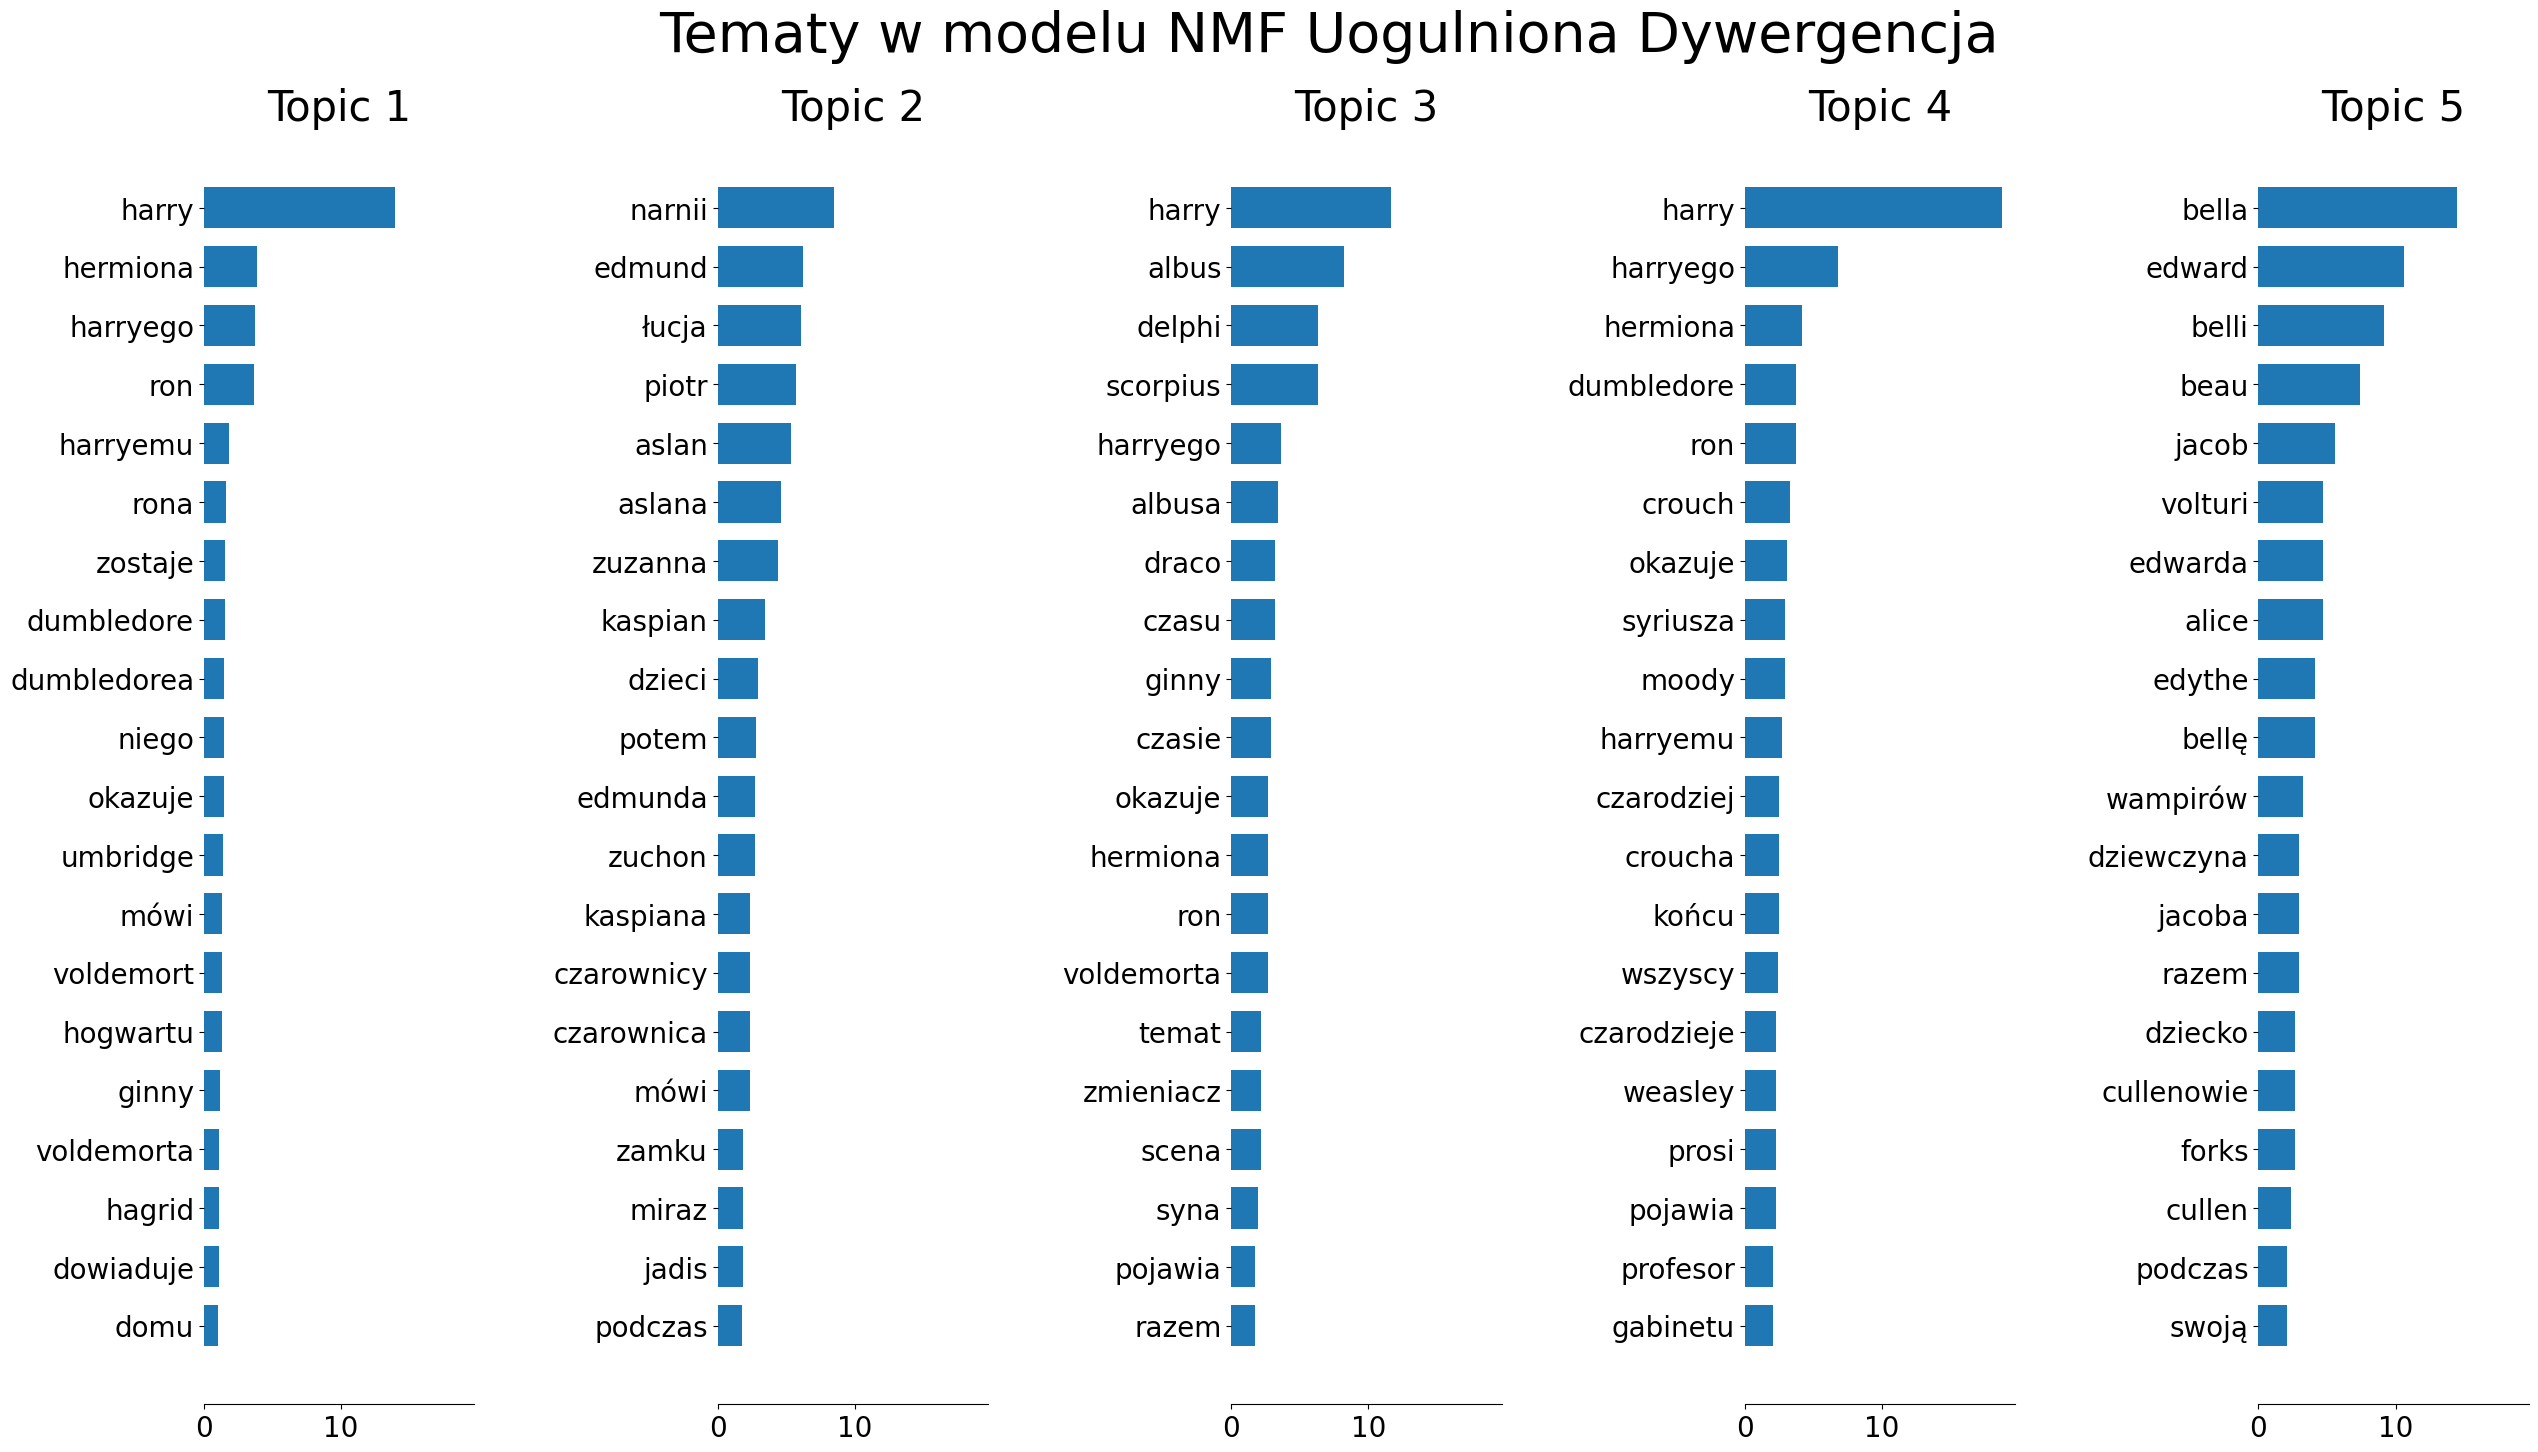

<Figure size 640x480 with 0 Axes>

In [49]:
nmf_kl = NMF(
    n_components=n_components,
    random_state=0,
    beta_loss="kullback-leibler",
    solver='mu',
    max_iter=1000,
    alpha_H=.00005,
    alpha_W=.00005,
    l1_ratio=.5,
)
nmf_kl.fit(counts_tf)
plot_top_words(nmf_kl, feature_names, n_top_features, "Tematy w modelu NMF Uogulniona Dywergencja", size)